In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data(fname):
    datarows = []
    with open(fname, 'r') as f:
        f.readline(); # read the header
        for line in f.readlines():
            datarows.append([float(s) for s in line.strip().split(',')])
    print(len(datarows))
    data = np.array(datarows)
    psis = data[:,-6]
    vs = data[:,-5]
    steers = data[:,-1]
    return data, psis, vs, steers

In [3]:
def plot(psis, vs, steers, dt, label=None):
    diffs = np.diff(psis)
    xs = vs[:-1]*steers[:-1] * dt
    keep = np.abs(diffs - diffs.mean()) < 3*diffs.std()
    y = diffs[keep,None]
    x = xs[keep,None]
    if label:
        plt.plot(x, y, '.', label=label)
    else:
        plt.plot(x, y, '.')
    plt.ylabel('diffs of psi');
    plt.xlabel('v * steer');

In [4]:
def regress(psis, vs, steers, dt, title=None):
    diffs = np.diff(psis)
    xs = vs[:-1] * steers[:-1] * dt
    keep = np.abs(diffs - diffs.mean()) < 3*diffs.std()
    y = diffs[keep,None]
    x = xs[keep,None]

    X = np.hstack((np.ones_like(x), x))
    X = x
    w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    lf =  -1/w[-1]
    print('intercept, lf', w[0], lf)
    
    # plot data and best fit line
    xx = np.linspace(x.min(), x.max(), 100)
    yy = w[0] * xx
#     plt.figure()
    label = 'est lf: %.3f' % lf
    if title:
        label = '%s; %s' % (title, label)
    plt.plot(x, y, '.');
    plt.plot(xx, yy, label=label);
    
    plt.ylabel('diffs of psi');
    plt.xlabel('v * steer');

In [5]:
from sklearn import linear_model
    
def regress2(psis, vs, steers, dt, alpha=1e-6, l1=True):
    if l1:
        regr = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    else:
        regr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    diffs = np.diff(psis)
    ys = vs[:-1] * steers[:-1] * dt
    keep = np.abs(diffs - diffs.mean()) < 3*diffs.std()
    x = diffs[keep,None]
    y = ys[keep,None]
    regr.fit(x, y)
    ypred = regr.predict(x)
    plt.plot(x, y, '.')
    plt.plot(x, ypred)
    print(regr.coef_)
    return regr

In [5]:
fname = 'logs/2018-10-17-11.58.41_lf_0.5'
_, psis, vs, steers = load_data(fname)
steers *= np.pi*25/180

327


In [12]:
fname = 'logs/2018-10-17-16.29.23_lf_0.5'
_, psis2, vs2, steers2 = load_data(fname)

539


In [13]:
fname = 'logs/2018-10-17-11.59.44_lf_1.0'
_, psis3, vs3, steers3 = load_data(fname)
steers *= np.pi*25/180

331


In [14]:
fname = 'logs/2018-10-17-16.32.35_lf_1.0'
_, psis4, vs4, steers4 = load_data(fname)

883


In [15]:
fname = 'logs/2018-10-17-16.34.39_lf_3.0'
_, psis5, vs5, steers5 = load_data(fname)

388


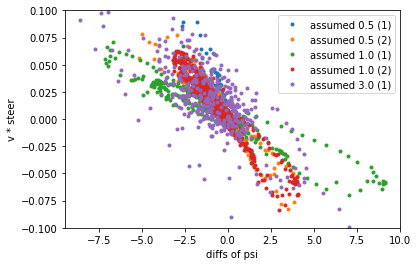

In [30]:
plot(psis, vs, steers, 'assumed 0.5 (1)')
plot(psis2, vs2, steers2, 'assumed 0.5 (2)')
plot(psis3, vs3, steers3, 'assumed 1.0 (1)')
plot(psis4, vs4, steers4, 'assumed 1.0 (2)')
plot(psis5, vs5, steers5, 'assumed 3.0 (1)')

plt.legend()
plt.ylim([-.1, .1]);

intercept, lf [-0.03706123] [2.69823768]
intercept, lf [-0.01760255] [5.68099643]
intercept, lf [-0.00767484] [13.02958921]
intercept, lf [-0.0181716] [5.50309302]
intercept, lf [-0.01301244] [7.68495446]


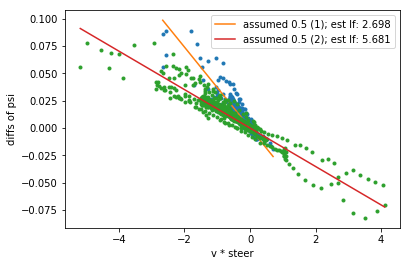

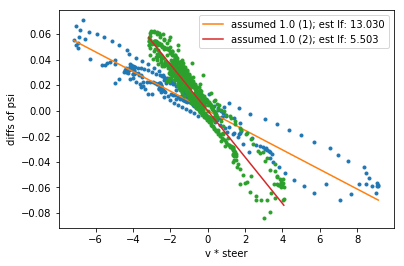

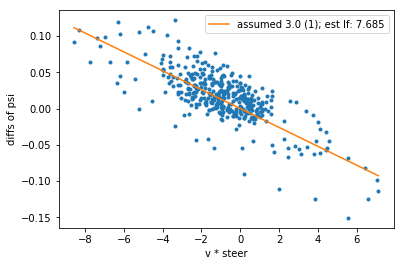

In [38]:
regress(psis, vs, steers, 0.1, 'assumed 0.5 (1)' )
regress(psis2, vs2, steers2, 0.1, 'assumed 0.5 (2)')
plt.legend();

plt.figure(); # new figure
regress(psis3, vs3, steers3, 0.1, 'assumed 1.0 (1)')
regress(psis4, vs4, steers4, 0.1, 'assumed 1.0 (2)')
plt.legend()

plt.figure(); 
regress(psis5, vs5, steers5, 0.1, 'assumed 3.0 (1)')
plt.legend();


364
(363,)
[6.14134581]
[4.70401189]


Lasso(alpha=1e-06, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

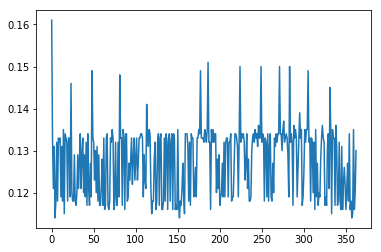

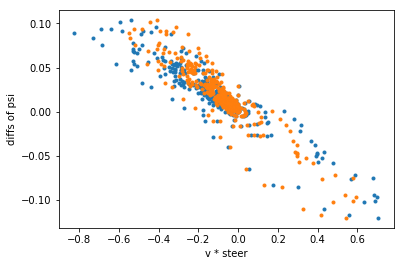

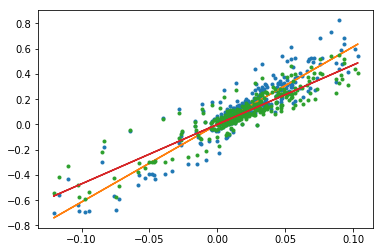

In [45]:
fname = 'logs/2018-10-22-01.31_lf_2.0_dt_0.10'
data6, psis6, vs6, steers6 = load_data(fname)
dt6 = np.diff(data6[:,0])/1e3
print(dt6.shape)
plt.plot(dt6);
plt.figure();
plot(psis6, vs6, steers6, dt6)
plot(psis6, vs6, steers6, .1)
plt.figure();
regress2(psis6, vs6, steers6, -dt6)
regress2(psis6, vs6, steers6, -.1)

308
[6.41603115]
[5.19108805]


Lasso(alpha=1e-06, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

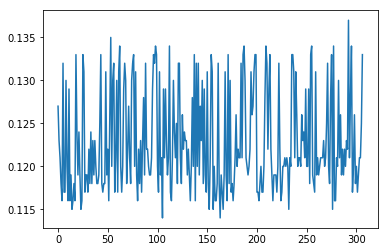

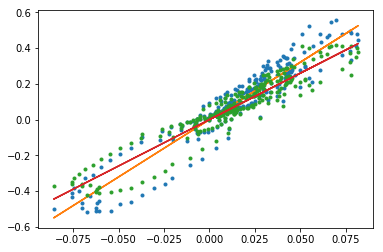

In [8]:
fname = 'logs/2018-10-22-21.28_lf_1.5_dt_0.10'
dt = float(fname.split('_')[-1])
data7, psis7, vs7, steers7 = load_data(fname)
dt7 = np.diff(data7[:,0])/1e3

plt.plot(dt7);
plt.figure();
regress2(psis7, vs7, steers7, -dt7, alpha=1e-6, l1=True)
regress2(psis7, vs7, steers7, -dt)